In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [1]:
from fastai.vision import *

In [3]:
!unzip "/content/drive/MyDrive/Colab Notebooks/archive.zip" -d "/content/drive/MyDrive/Colab Notebooks"

Archive:  /content/drive/MyDrive/Colab Notebooks/archive.zip
replace /content/drive/MyDrive/Colab Notebooks/Soil_Dataset/Test/Alluvial_Soil/Alluvial_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
path = Path("/content/drive/MyDrive/Colab Notebooks/Soil_Dataset")
path

PosixPath('/content/drive/MyDrive/Colab Notebooks/Soil_Dataset')

In [3]:
data = ImageDataBunch.from_folder(path,train = 'Train', test='Test', size=224)

/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:461: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


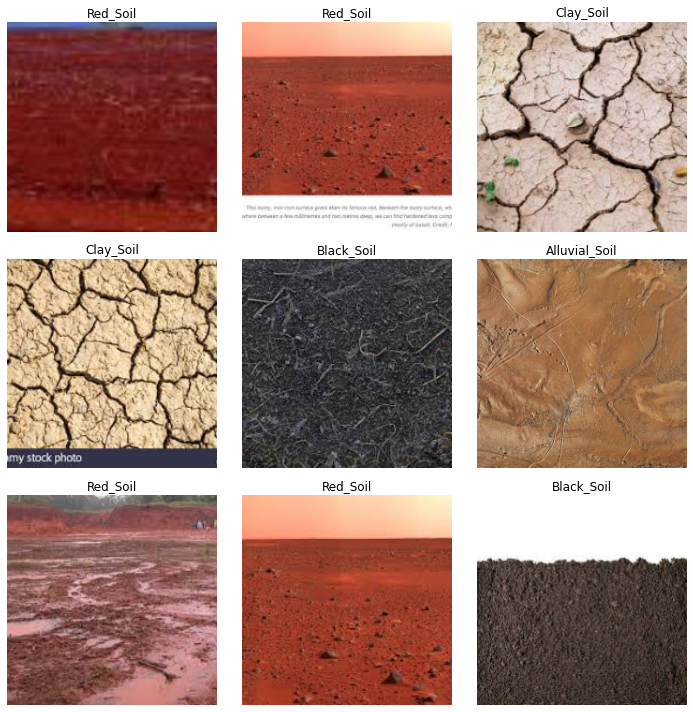

In [4]:
data.show_batch(rows=3, figsize=(10,10))

In [5]:
classes = ['alluvial', 'red', 'black','clay']

In [6]:
for i in classes:
    print(i)
    verify_images(path/i, delete=True, nax_workers=8)

alluvial
red
black
clay


In [7]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(),
                                 size=224, num_workers=4).normalize(imagenet_stats)

In [8]:
data.classes, data.c

(['Alluvial_Soil', 'Black_Soil', 'Clay_Soil', 'Red_Soil'], 4)

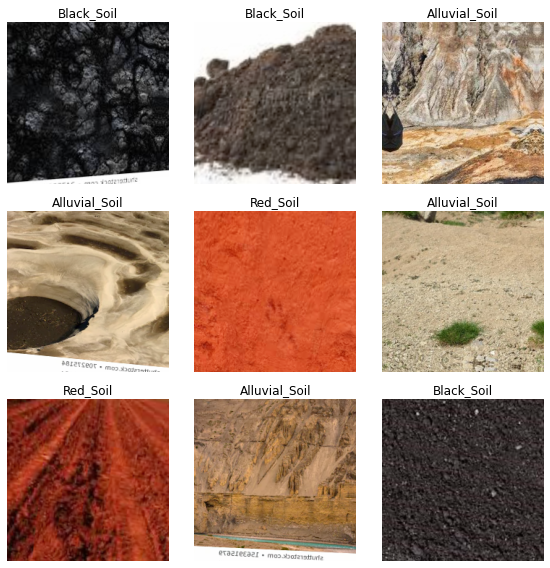

In [9]:
data.show_batch(rows=3, figsize=(8, 8))

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.335235,0.380042,0.133333,04:31
1,0.757591,0.143584,0.027778,04:25
2,0.539827,0.150200,0.033333,04:21
3,0.402953,0.146216,0.033333,04:23


In [12]:
interp = ClassificationInterpretation.from_learner(learn)

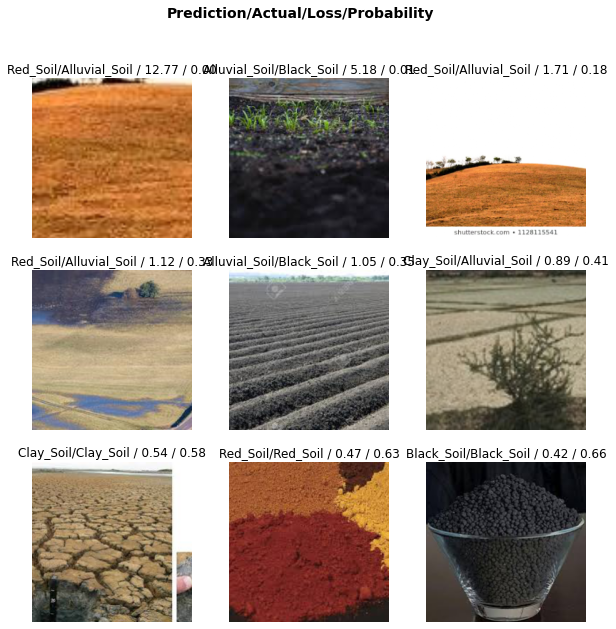

In [13]:
interp.plot_top_losses(9, figsize=(10,10))

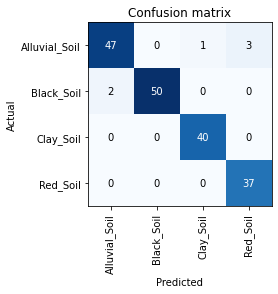

In [14]:
interp.plot_confusion_matrix()

In [19]:
learn.export('trained_model.pkl')

In [18]:
learn.save("soilclassify")

In [21]:
from __future__ import division, print_function
# coding=utf-8
import sys
import os
import glob
import re
from pathlib import Path

In [22]:
from flask import Flask, redirect, url_for, request, render_template
from werkzeug.utils import secure_filename

In [30]:
app = Flask(__name__)

In [31]:
def model_predict(img_path):
    """
       model_predict will return the preprocessed image
    """
   
    img = open_image(img_path)
    pred_class,pred_idx,outputs = learn.predict(img)
    return pred_class

In [32]:
@app.route('/', methods=['GET'])
def index():
    # Main page
    return render_template('index.html')

In [33]:
@app.route('/predict', methods=['GET', 'POST'])
def upload():
    if request.method == 'POST':
        # Get the file from post request
        f = request.files['file']

        # Save the file to ./uploads
        basepath = os.path.dirname(__file__)
        file_path = os.path.join(
            basepath, 'uploads', secure_filename(f.filename))
        f.save(file_path)

        # Make prediction
        preds = model_predict(file_path)
        return preds
    return None

In [34]:
if __name__ == '__main__':
    
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [28]:
!pip install flask-ngrok

In [29]:
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from werkzeug.utils import secure_filename

app = Flask(__name__)
run_with_ngrok(app)  

In [36]:
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from werkzeug.utils import secure_filename

app = Flask(__name__)
run_with_ngrok(app)  

def model_predict(img_path):
    """
       model_predict will return the preprocessed image
    """
   
    img = open_image(img_path)
    pred_class,pred_idx,outputs = learn.predict(img)
    
@app.route('/', methods=['GET'])
def index():
    # Main page
    return render_template('index.html')

@app.route('/predict', methods=['GET', 'POST'])
def upload():
    if request.method == 'POST':
        # Get the file from post request
        f = request.files['file']

        # Save the file to ./uploads
        basepath = os.path.dirname(__file__)
        file_path = os.path.join(
            basepath, 'uploads', secure_filename(f.filename))
        f.save(file_path)

        # Make predi
        preds = model_predict(file_path)
        return preds
    return None

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://f1ab02a5f588.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


[2021-03-26 07:56:06,878] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.7/dist-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-36-2c3be873ae65>", line 22, in index
    return render_template('index.html')
  File "/usr/